#  Strocke Prediction

### 1. Problem Definition
The goal is to develop a predictive model that accurately estimates stroke risk using a set of independent features.

### 2. Data

The Dataset if from a kaggle competition named *Stroke Prediction Dataset*.
- Link: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## Libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer




## Data preprocessing


In [3]:
# Load the dataset
data = pd.read_csv(r'E:\3rd Year 1st semi\Fdm\FDM_Project\Strock Prediction\Dataset\healthcare-dataset-stroke-data.csv')

print("No of columns in the data : ", len(data.columns))
print("No of rows in the data : ", len(data))
print("\nFirst 5 Rows of the Data:")
data.head()

No of columns in the data :  12
No of rows in the data :  5110

First 5 Rows of the Data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Data overview
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# Basic statistics of numerical features
print("\nStatistical Summary:")
data.describe()  


Statistical Summary:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# Check for missing values
missing_data = data.isnull().sum()
print("\nMissing Data in Each Column:")
print(missing_data)


Missing Data in Each Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [7]:
# Mean imputation
imputer = SimpleImputer(strategy='mean')
data['bmi'] = imputer.fit_transform(data[['bmi']])

# Impute missing numerical values in 'bmi' with the median
# imputer = SimpleImputer(strategy='median')
# data['bmi'] = imputer.fit_transform(data[['bmi']])

# from sklearn.impute import KNNImputer

# # Create a KNN imputer with k neighbors (default k=5)
# imputer = KNNImputer(n_neighbors=5)

# # Apply the imputer to the 'bmi' column
# data[['bmi']] = imputer.fit_transform(data[['bmi']])


In [8]:
# Check if all missing values are handled
print("\nMissing Data After Imputation:")
print(data.isnull().sum())


Missing Data After Imputation:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [9]:
# Remove 'id' column as it's not useful for prediction
data.drop('id', axis=1, inplace=True)

## Variable separation

In [10]:
# Label encoding for categorical features
label_encoders = {}
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

print("\nTransformed Categorical Columns:")
data.head()



Transformed Categorical Columns:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [11]:
# Check for duplicates and remove them
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)




Number of Duplicate Rows: 0


### Exploratory Data Analysis

In [12]:
#descripe statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,0.414286,0.493044,0.00,0.000,0.000,1.00,2.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,2.167710,1.090293,0.00,2.000,2.000,3.00,4.00
Residence_type,5110.0,0.508023,0.499985,0.00,0.000,1.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
smoking_status,5110.0,1.376908,1.071534,0.00,0.000,2.000,2.00,3.00


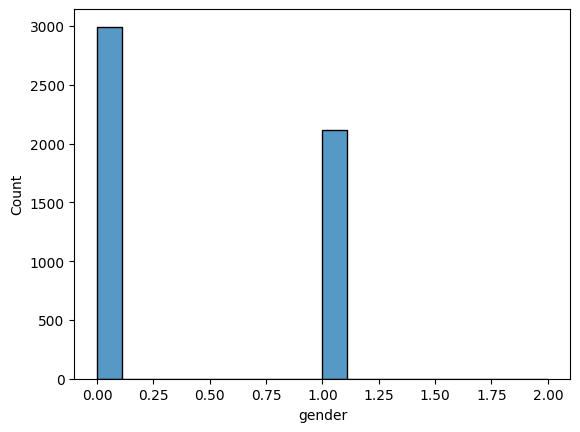

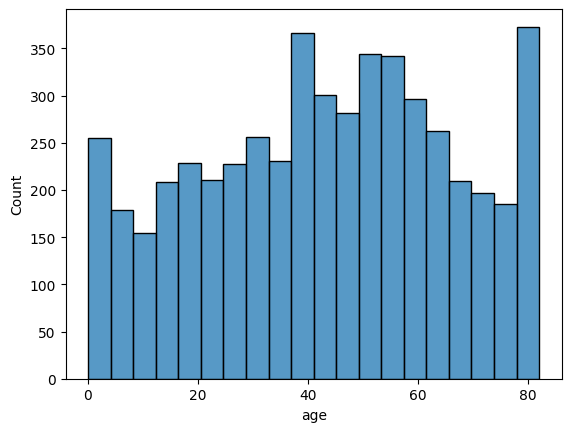

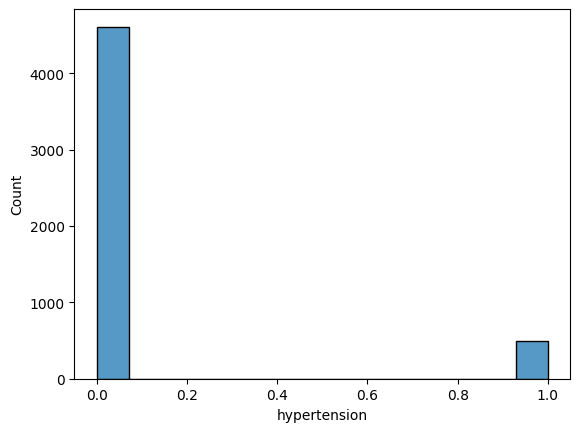

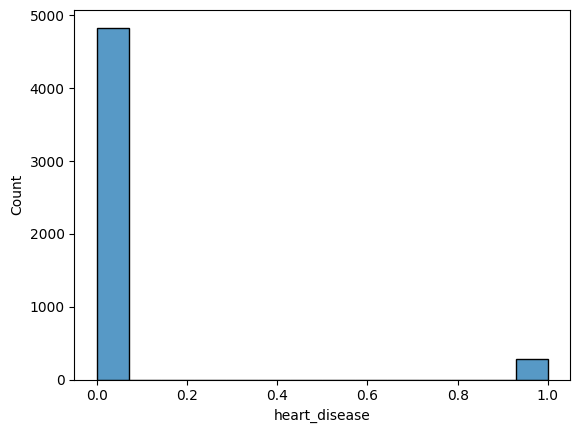

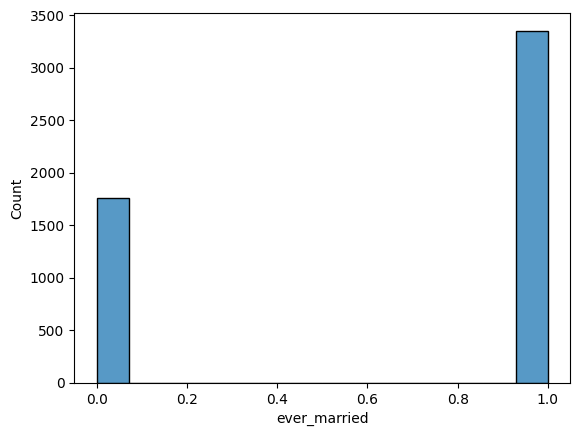

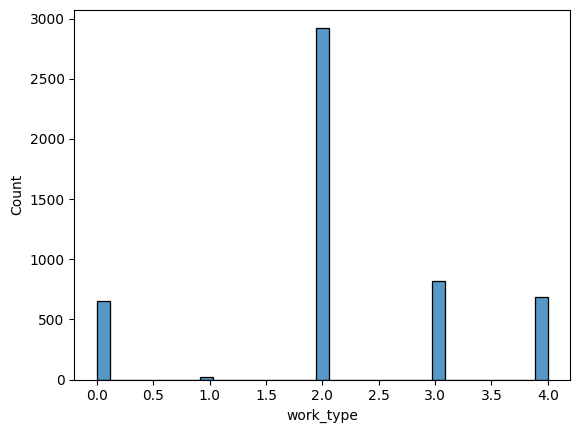

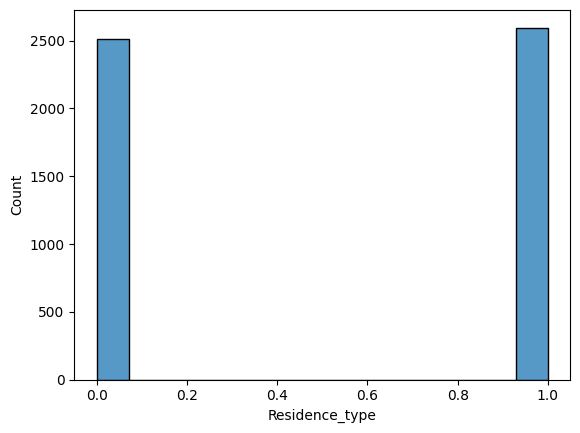

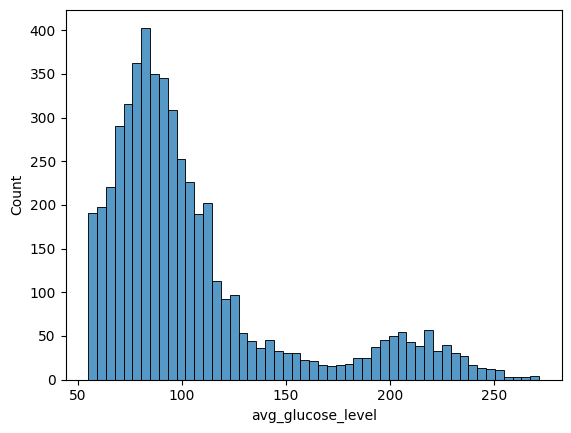

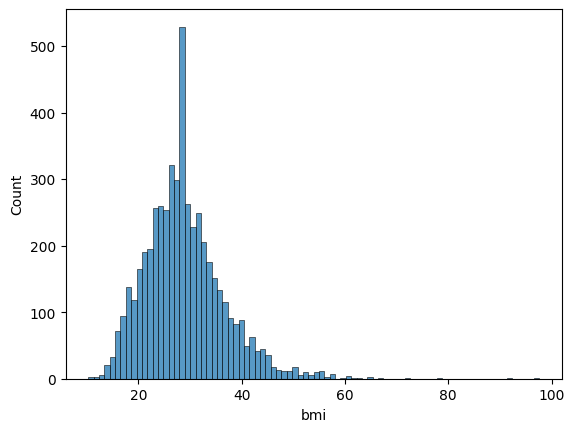

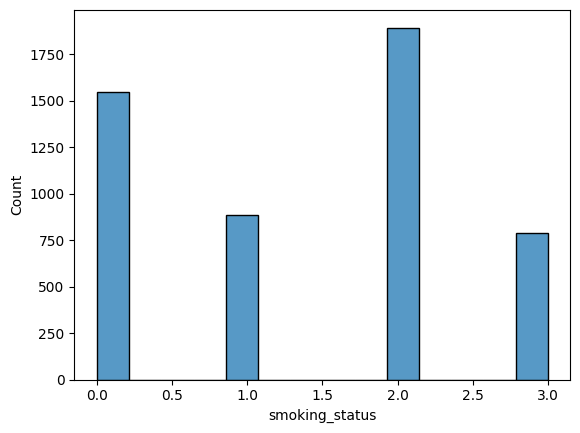

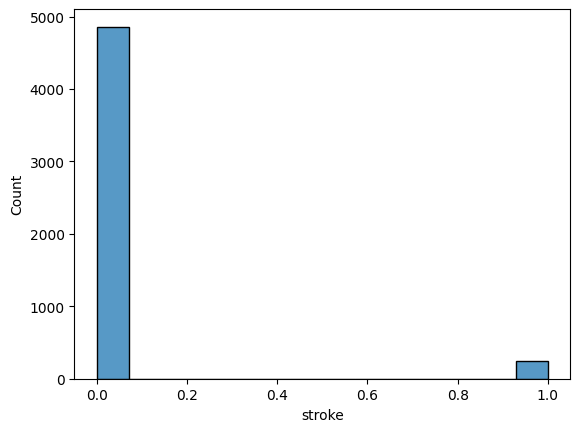

In [13]:
# Visualize the distribution of numerical features
for i in data.select_dtypes(include="number").columns:
    sns.histplot(data=data, x=i)
    plt.show()

In [14]:
data.select_dtypes(include="number").columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

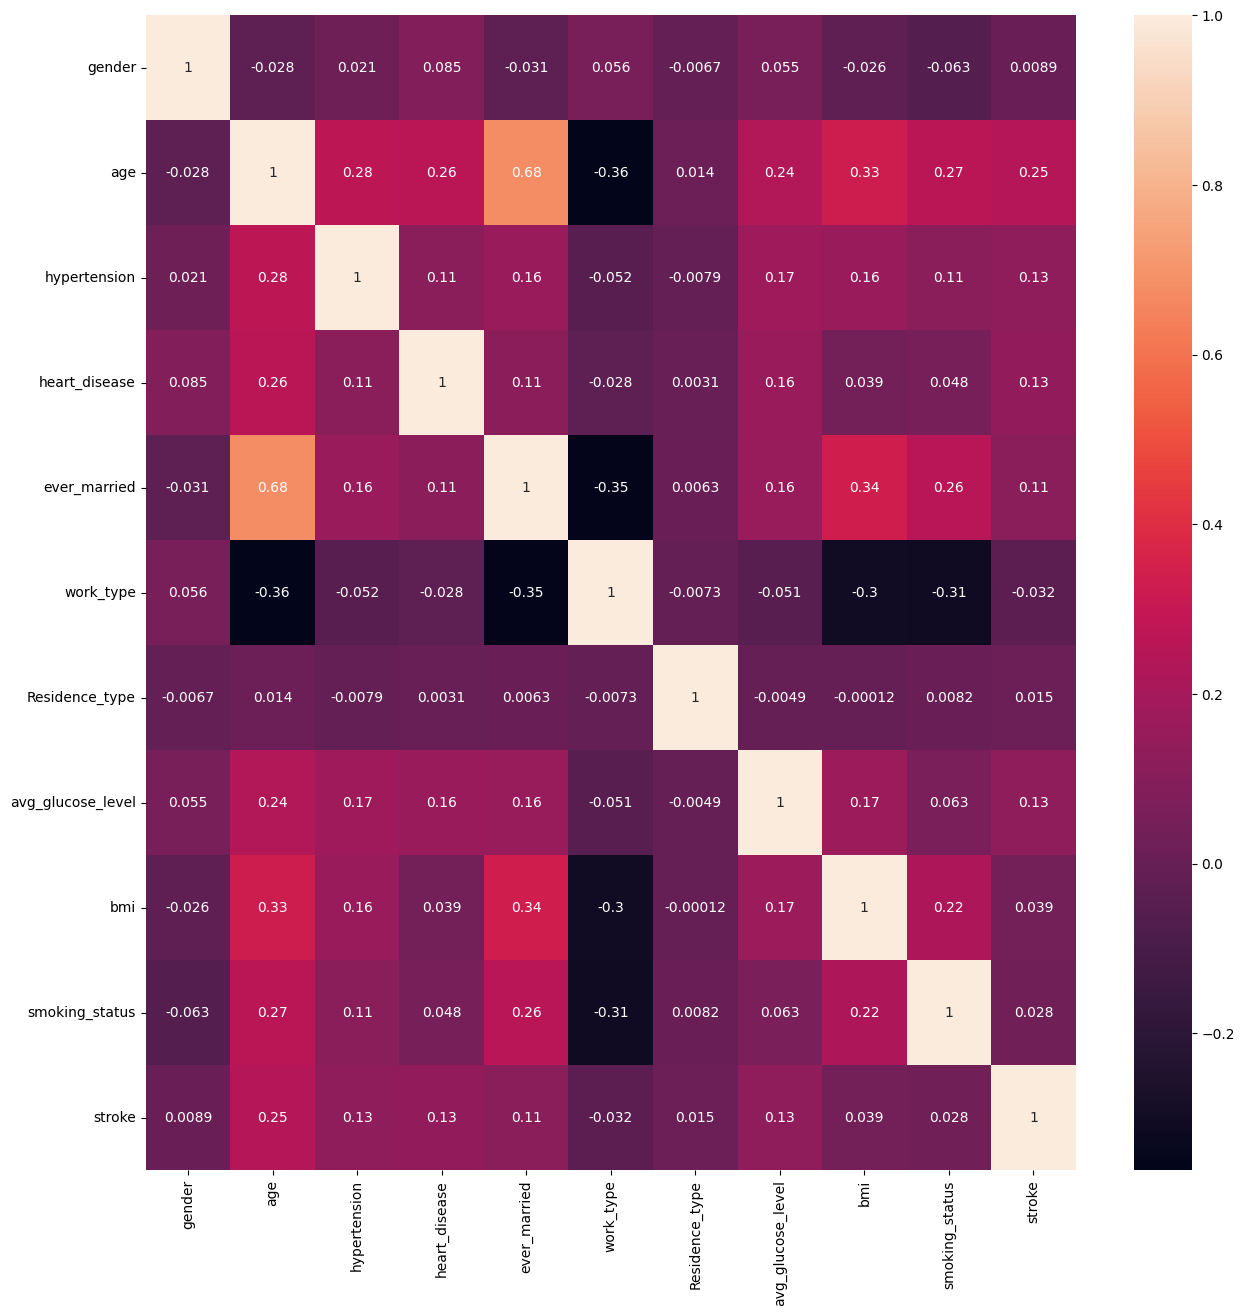

In [15]:
# Correlation heatmap
correlation_matrix = data.select_dtypes(include="number").corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Feature Scaling and Train-Test Split

In [16]:

# Separate features and target variable
X = data.drop(columns=['stroke'])  # Features (independent variables)
y = data['stroke']  # Target (dependent variable)

In [17]:
# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [18]:
# Step 5: Splitting the Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and Test Data Sizes:")
print(f"Training Data: {X_train.shape}, Test Data: {X_test.shape}")


Training and Test Data Sizes:
Training Data: (4088, 10), Test Data: (1022, 10)


### Model Training and Evaluation

##### Logistic Regression

In [23]:
# Train Logistic Regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log * 100:.2f}%")


# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))




Logistic Regression Accuracy: 93.93%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Confusion Matrix:
[[960   0]
 [ 62   0]]


c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

##### Random Forest

In [200]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))





Random Forest Accuracy: 94.03%

Confusion Matrix:
[[960   0]
 [ 61   1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



##### Decision Tree

In [198]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 91.29%

Confusion Matrix:
[[960   0]
 [ 62   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       960
           1       0.22      0.18      0.20        62

    accuracy                           0.91      1022
   macro avg       0.59      0.57      0.58      1022
weighted avg       0.90      0.91      0.91      1022



##### Support Vector Machine (SVM)

In [199]:
# Train SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm * 100:.2f}%")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 93.93%

Confusion Matrix:
[[960   0]
 [ 62   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Startklar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

### SMOTE (Synthetic Minority Over-sampling Technique)

##### SMOTE generates synthetic samples for minority classes in imbalanced datasets to enhance model performance.

In [167]:
# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Scale numerical features after SMOTE
X_smote[numerical_columns] = scaler.fit_transform(X_smote[numerical_columns])

# Train-test split after SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)


In [168]:
# Scale numerical features after train-test split
scaler = StandardScaler()
numerical_columns = ['age', 'avg_glucose_level', 'bmi']
X_train_smote[numerical_columns] = scaler.fit_transform(X_train_smote[numerical_columns])
X_test_smote[numerical_columns] = scaler.transform(X_test_smote[numerical_columns])

# Check Training and Test Data Sizes after SMOTE
print("\nTraining and Test Data Sizes After SMOTE:")
print(f"Training Data: {X_train_smote.shape}, Test Data: {X_test_smote.shape}")


Training and Test Data Sizes After SMOTE:
Training Data: (7777, 11), Test Data: (1945, 11)


In [169]:
# Train a Random Forest Model with Hyperparameter Tuning using GridSearchCV
rf = RandomForestClassifier(random_state=42, oob_score=True)
param_grid = {
    'n_estimators': [100, 200 ],
    'max_depth': [None, 10, 20 ],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)
print("Best Hyperparameters:", grid_search_rf.best_params_)
print("Best Accuracy:", grid_search_rf.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9394380842956215


In [170]:
# Save the best model
best_rf = grid_search_rf.best_estimator_
pickle.dump(best_rf, open('./rf_model.pkl', 'wb'))
pickle.dump(scaler, open('./scaler.pkl', 'wb'))

In [171]:
# Evaluate the tuned model on the test set
y_pred_rf = best_rf.predict(X_test_smote)
accuracy_rf = accuracy_score(y_test_smote, y_pred_rf)
print(f"Random Forest Accuracy after tuning: {accuracy_rf * 100:.2f}%")

Random Forest Accuracy after tuning: 93.88%



Confusion Matrix:
[[894  81]
 [ 38 932]]


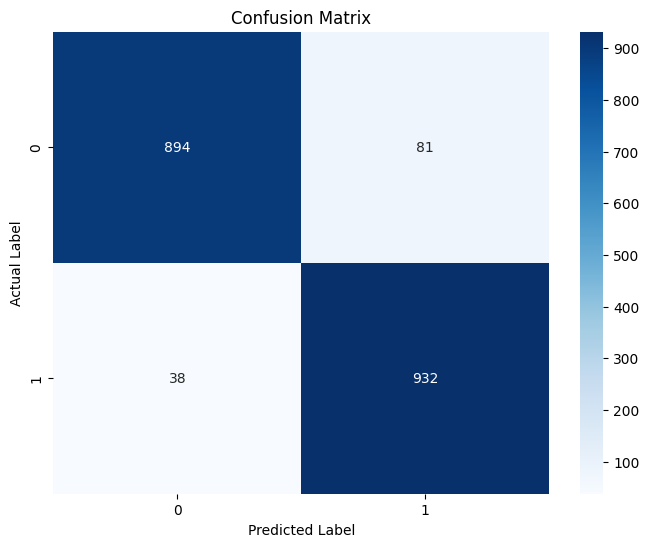

In [172]:
# Generate the confusion matrix
cm = confusion_matrix(y_test_smote, y_pred_rf)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [173]:

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_smote, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       975
           1       0.92      0.96      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

